<a href="https://colab.research.google.com/github/Kluckhardt/HW6/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

##Q3
Please follow the instructions below and inspect the outputs before you proceed. You can always check this original final to compare your results in your own copy.

In [11]:
#You have to make sure that you were able to write the file to a csv while your were working in R
import pandas as pd
house= pd.read_csv('/content/house_prices.csv')
house.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
0,1,1976-01-01,Alabama,6.7,37.138285,0.040405
1,2,1976-02-01,Alabama,6.7,37.756437,0.051806
2,3,1976-03-01,Alabama,6.6,38.276319,0.059302
3,4,1976-04-01,Alabama,6.5,38.596135,0.059585
4,5,1976-05-01,Alabama,6.4,38.740517,0.055723


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [15]:
states = ['Michigan', 'California', 'Texas', 'Indiana']

filtered_house = house[house['state'].isin(states)].copy()

if filtered_house['date'].dtype == 'object':
    filtered_house['date'] = pd.to_datetime(filtered_house['date'], errors='coerce')

filtered_house.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
2016,2017,1976-01-01,California,9.1,17.908764,0.139067
2017,2018,1976-02-01,California,9.1,18.117587,0.148485
2018,2019,1976-03-01,California,9.0,18.379530,0.151243
2019,2020,1976-04-01,California,9.0,18.673067,0.147308
2020,2021,1976-05-01,California,8.9,18.899995,0.143167


b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

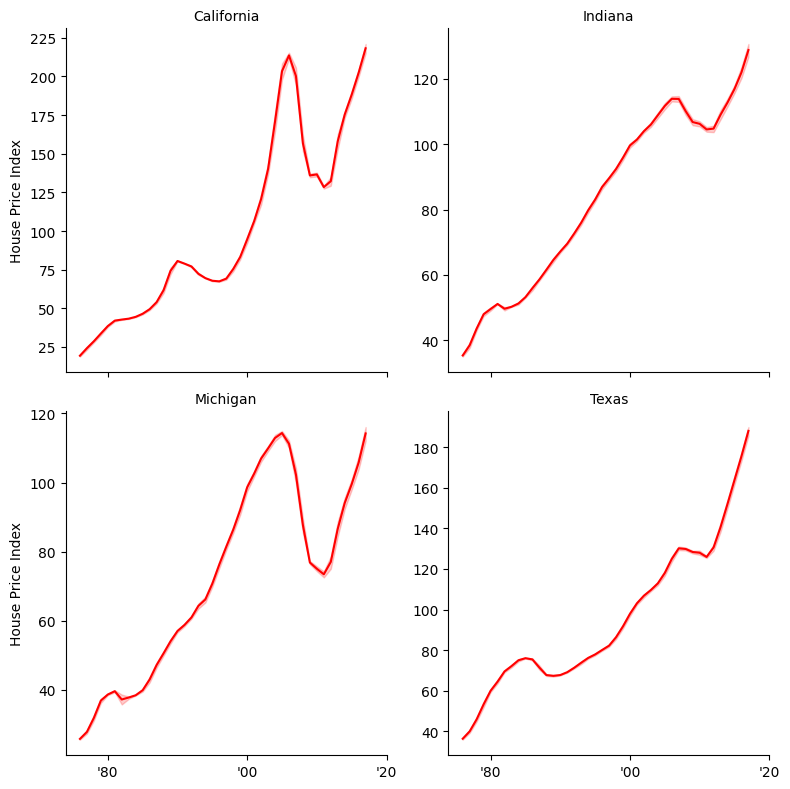

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_house['year'] = pd.to_datetime(filtered_house['date']).dt.year

g = sns.FacetGrid(filtered_house, col='state', col_wrap=2, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='year', y='house_price_index', color='red')

g.set(xticks=[1980, 2000, 2020])
g.set_xticklabels(["'80", "'00", "'20"])

g.set_titles("{col_name}")
g.set_ylabels("House Price Index")
g.set_xlabels("")  # Remove x-axis label


plt.tight_layout()
plt.show()



c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

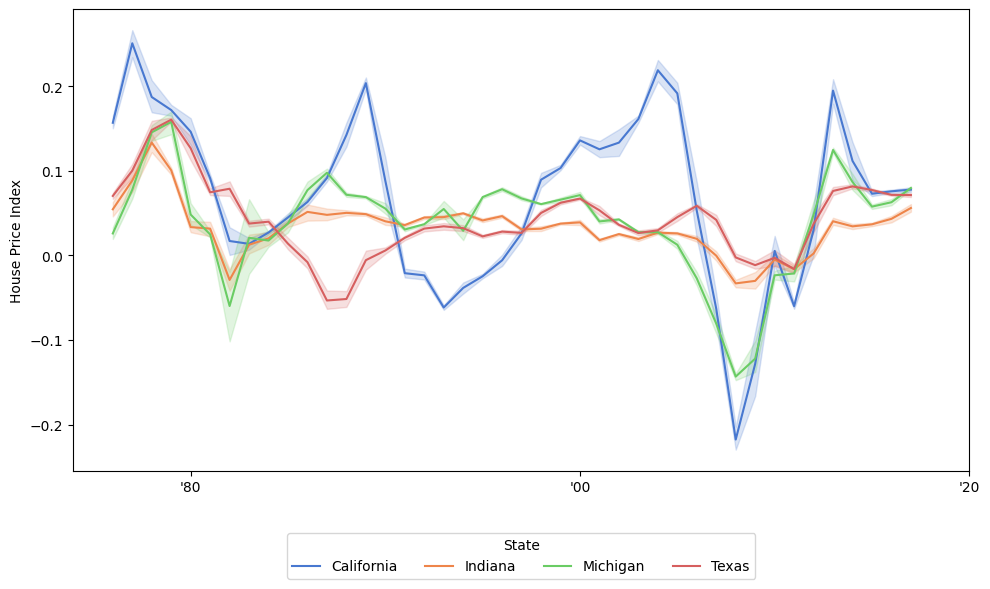

In [18]:
#your code goes here
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_house, x='year', y='house_price_perc', hue='state', palette='muted')
plt.ylabel('House Price Index')
plt.xlabel('')
plt.xticks([1980, 2000, 2020], ["'80", "'00", "'20"])
plt.legend(title='State', loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=4)
plt.tight_layout()
plt.show()


##Q4
Please work on your 4th question below. Please feel free to add new code cells.

In [8]:
import pandas as pd
world_cup = pd.read_csv('/content/WorldCupMatches.csv')
world_cup.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [9]:
team_pairs = world_cup.groupby(['Home Team Initials', 'Away Team Initials']).size().reset_index(name='Match Count')
sample_output = world_cup[['Home Team Initials', 'Away Team Initials', 'Home Team Goals', 'Away Team Goals']].head()

print("Grouped Match Counts Between Team Pairs:")
print(team_pairs.head())

print("\nSample Output with Last Two Columns:")
print(sample_output)
team_pairs.head()

Grouped Match Counts Between Team Pairs:
  Home Team Initials Away Team Initials  Match Count
0                ALG                AUT            1
1                ALG                CHI            1
2                ALG                ESP            1
3                ALG                NIR            1
4                ALG                RUS            1

Sample Output with Last Two Columns:
  Home Team Initials Away Team Initials  Home Team Goals  Away Team Goals
0                FRA                MEX                4                1
1                USA                BEL                3                0
2                YUG                BRA                2                1
3                ROU                PER                3                1
4                ARG                FRA                1                0


,Home Team Initials,Away Team Initials,Match Count
0,ALG,AUT,1
1,ALG,CHI,1
2,ALG,ESP,1
3,ALG,NIR,1
4,ALG,RUS,1


Make sure that you only write four columns ('Home Team Initials', 'Away Team Initials', 'weight', 'HomeGoalTotal') from the data frame, team_pairs, to a csv file

In [23]:
import pandas as pd
world_cup = pd.read_csv('/content/WorldCupMatches.csv')
world_cup.head()
team_pairs['pair'] = team_pairs.apply(
    lambda row: '-'.join(sorted([row['Home Team Initials'], row['Away Team Initials']])), axis=1
)

team_pairs_bonus = team_pairs.groupby('pair', as_index=False)['Match Count'].sum()

team_pairs_bonus.to_csv('team_pairs_consolidated.csv', index=False)

from google.colab import files

team_pairs_bonus.to_csv('team_pairs_consolidated.csv', index=False)
files.download('team_pairs_consolidated.csv')
team_pairs_bonus.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,pair,Match Count
0,ALG-AUT,1
1,ALG-BEL,1
2,ALG-BRA,1
3,ALG-CHI,1
4,ALG-ENG,1
